In [1]:
from uxsim import *
import pandas as pd

At this time, we automatically generate a grid-shaped network.

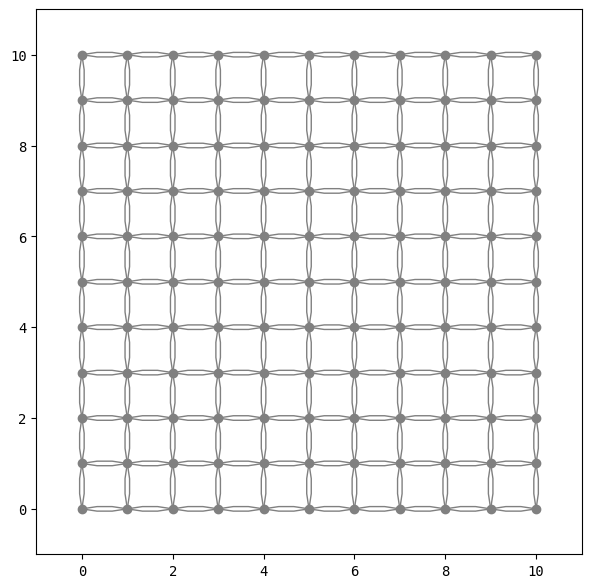

In [2]:
W = World(
    name="large",
    deltan=5,
    tmax=7200,
    print_mode=1, save_mode=1, show_mode=0,
    random_seed=0,
)

# create nodes on an imax x jmax grid.
imax = 11
jmax = 11
nodes = {}
for i in range(imax):
    for j in range(jmax):
        nodes[i,j] = W.addNode(f"n{(i,j)}", i, j)

# create links between neighborhood nodes
links = {}
for i in range(imax):
    for j in range(jmax):
        if i != imax-1:
            links[i,j,i+1,j] = W.addLink(f"l{(i,j,i+1,j)}", nodes[i,j], nodes[i+1,j], length=1000, free_flow_speed=20, jam_density=0.2)
        if i != 0:
            links[i,j,i-1,j] = W.addLink(f"l{(i,j,i-1,j)}", nodes[i,j], nodes[i-1,j], length=1000, free_flow_speed=20, jam_density=0.2)
        if j != jmax-1:
            links[i,j,i,j+1] = W.addLink(f"l{(i,j,i,j+1)}", nodes[i,j], nodes[i,j+1], length=1000, free_flow_speed=20, jam_density=0.2)
        if j != 0:
            links[i,j,i,j-1] = W.addLink(f"l{(i,j,i,j-1)}", nodes[i,j], nodes[i,j-1], length=1000, free_flow_speed=20, jam_density=0.2)

# generate demand from each boundary node to the other boundary nodes
demand_flow = 0.035
demand_duration = 3600
for n1 in [(0,j) for j in range(jmax)]:
    for n2 in [(imax-1,j) for j in range(jmax)]:
        W.adddemand(nodes[n2], nodes[n1], 0, demand_duration, demand_flow)
        W.adddemand(nodes[n1], nodes[n2], 0, demand_duration, demand_flow)
for n1 in [(i,0) for i in range(imax)]:
    for n2 in [(i,jmax-1) for i in range(imax)]:
        W.adddemand(nodes[n2], nodes[n1], 0, demand_duration, demand_flow)
        W.adddemand(nodes[n1], nodes[n2], 0, demand_duration, demand_flow)

W.show_network(network_font_size=0)

Note that each link is 1 km long, so this is a 10 km x 10 km area. And the total number of vehicles is about 60000.

In [3]:
W.exec_simulation()

simulation setting:
 scenario name: large
 simulation duration:	 7200 s
 number of vehicles:	 60500 veh
 total road length:	 440000 m
 time discret. width:	 5 s
 platoon size:		 5 veh
 number of timesteps:	 1440
 number of platoons:	 12100
 number of links:	 440
 number of nodes:	 121
 setup time:		 17.47 s
simulating...
      time| # of vehicles| ave speed| computation time
       0 s|        0 vehs|   0.0 m/s|     0.00 s
     600 s|     8325 vehs|  11.4 m/s|     4.51 s
    1200 s|    15560 vehs|  11.0 m/s|     9.90 s
    1800 s|    19265 vehs|   9.5 m/s|    16.09 s
    2400 s|    22800 vehs|   7.9 m/s|    22.02 s
    3000 s|    26825 vehs|   6.4 m/s|    28.13 s
    3600 s|    32360 vehs|   5.2 m/s|    35.01 s
    4200 s|    28420 vehs|   5.6 m/s|    41.80 s
    4800 s|    20670 vehs|   7.2 m/s|    47.09 s
    5400 s|    12225 vehs|  10.9 m/s|    51.09 s
    6000 s|     3080 vehs|  17.2 m/s|    53.29 s
    6600 s|       35 vehs|  18.6 m/s|    54.05 s
    7195 s|        0 vehs|   0.0 m

1

 generating animation...


  0%|          | 0/48 [00:00<?, ?it/s]

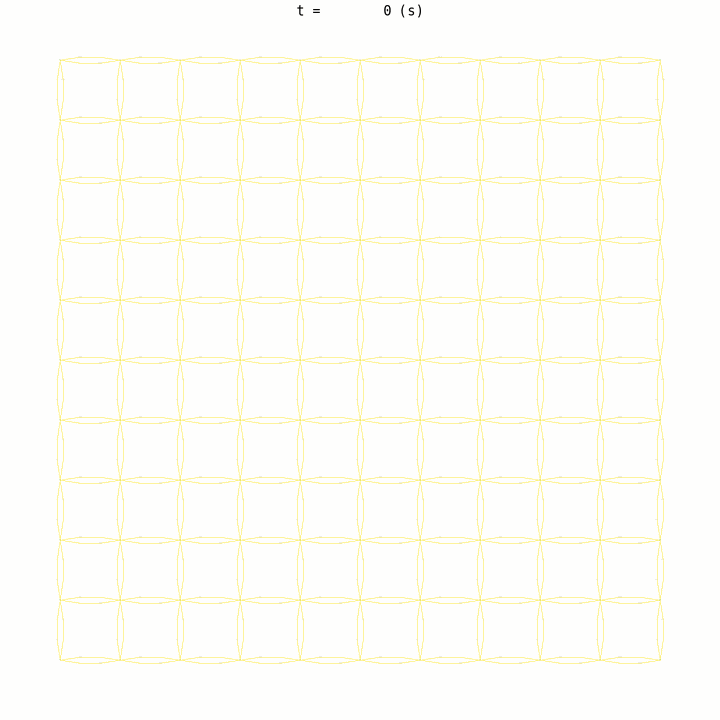

In [4]:
W.analyzer.output_data();
W.analyzer.network_anim(animation_speed_inverse=15, timestep_skip=30, detailed=0, network_font_size=1, figsize=(6,6))

from IPython.display import display, Image
with open("outlarge/anim_network0.gif", "rb") as f:
    display(Image(data=f.read(), format='png'))

In [ ]:
W.analyzer.network_fancy(animation_speed_inverse=15, sample_ratio=0.3, interval=3, trace_length=5, network_font_size=1)

with open("outlarge/anim_network_fancy.gif", "rb") as f:
    display(Image(data=f.read(), format='png'))

 generating animation...


  0%|          | 0/720 [00:00<?, ?it/s]